# Kaggle Competition

## Data Preprocess

In [1]:
import pandas as pd
import numpy as np
import json
json_path = '../input/dm2022-isa5810-lab2-homework/tweets_DM.json'
json_list = list()
with open(json_path , 'r') as file:
    for line in file:
        json_list.append(json.loads(line))

In [2]:
tweet_list = list()
for json in json_list:
    tweet_id = json['_source']['tweet']['tweet_id']
    hashtags = json['_source']['tweet']['hashtags']
    hashtag = ' '.join(hashtags)
    text = json['_source']['tweet']['text']

    tweet_list.append([tweet_id, text, hashtag])
tweet_df = pd.DataFrame(tweet_list, columns=['tweet_id', 'text', 'hashtag'])
tweet_df   


,tweet_id,text,hashtag
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",Snapchat
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",freepress TrumpLegacy CNN
2,0x28b412,"Confident of your obedience, I write to you, k...",bibleverse
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,
4,0x2de201,"""Trust is not the same as faith. A friend is s...",
...,...,...,...
1867530,0x316b80,When you buy the last 2 tickets remaining for ...,mixedfeeling butimTHATperson
1867531,0x29d0cb,I swear all this hard work gone pay off one da...,
1867532,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us...",


In [3]:
emotion_df = pd.read_csv('../input/dm2022-isa5810-lab2-homework/emotion.csv')
identification_df = pd.read_csv('../input/dm2022-isa5810-lab2-homework/data_identification.csv')
emotion_df


,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


In [4]:

test_df = identification_df[(identification_df['identification'] == 'test')]
train_df = pd.merge(tweet_df, emotion_df)

train_df


,tweet_id,text,hashtag,emotion
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",Snapchat,anticipation
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",freepress TrumpLegacy CNN,sadness
2,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,,fear
3,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,authentic LaughOutLoud,joy
4,0x2c91a8,Still waiting on those supplies Liscus. <LH>,,anticipation
...,...,...,...,...
1455558,0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,NoWonder Happy,joy
1455559,0x38959e,In every circumtance I'd like to be thankful t...,,joy
1455560,0x2cbca6,there's currently two girls walking around the...,blessyou,joy
1455561,0x24faed,"Ah, corporate life, where you can date <LH> us...",,joy


In [5]:
train_emotion = train_df.emotion
train_df.drop('tweet_id', inplace=True, axis=1)


In [6]:
train_df.shape

(1455563, 3)

In [7]:
max(train_df.text.apply(lambda x : len(x)))

202

### Replace redundent words

In [8]:
# Import Regular Expressions lib
import re
# Using regex to find the NA values
# first separate the NaN data and other datas
MAX_LENGTH = 30
train_df.text = train_df.text.apply(lambda x: re.sub('|<|>|@|#|0|1|2|3|4|5|6|7|8|9', '', x))
train_df.text = train_df.text.apply(lambda x: re.sub('|:|pm|am|AM|PM', '', x))
#train_df = train_df[~(train_df.text.apply(lambda x : len(x)) > MAX_LENGTH)]



In [9]:
for i in range (101, 111, 1):
    print(f"""[原始文本]
    句子 1：{train_df.text[i]}
    分類  ：{train_df.emotion[i]}
    --------------------
    """)

[原始文本]
    句子 1：I Never Take For Granted Waking Up To See Another Day Blessed😇🙌🏽💕
    分類  ：joy
    --------------------
    
[原始文本]
    句子 1：Maybe someday Ill get this whole weight room thing...sigh. LH
    分類  ：sadness
    --------------------
    
[原始文本]
    句子 1：Honestly I feel for JUSTICEFORJAZZY I swear she handled this like an angel.  LH is so proud of you sis This is why I don’t do roomates😡
    分類  ：anticipation
    --------------------
    
[原始文本]
    句子 1：we’re really getting new charli, brockhpton, and eminem on the se day LH
    分類  ：joy
    --------------------
    
[原始文本]
    句子 1：Gods Love is AZING!
    分類  ：anticipation
    --------------------
    
[原始文本]
    句子 1：Capricorn ♑ LH dre
    分類  ：trust
    --------------------
    
[原始文本]
    句子 1：My car aux works again LH
    分類  ：joy
    --------------------
    
[原始文本]
    句子 1：someaningless I  LH  What are you doing this Friday?
    分類  ：joy
    --------------------
    
[原始文本]
    句子 1：Don’t wait for everything to be 

In [10]:
train_df.shape

(1455563, 3)

### Stratify Test Train Data

In [11]:
pd.Series(train_emotion).value_counts(normalize=True)

joy             0.354514
anticipation    0.171023
trust           0.141167
sadness         0.132895
disgust         0.095565
fear            0.043969
surprise        0.033478
anger           0.027389
Name: emotion, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
SAMPLE_FRAC = 0.01
train_df = train_df.sample(frac=SAMPLE_FRAC, random_state=447)
df_train, df_test, y_train, y_test= train_test_split(train_df, train_df.emotion, random_state=777, train_size = 0.7, stratify=train_df.emotion)
print(df_train.shape)
print(df_test.shape)


(10189, 3)
(4367, 3)


In [13]:
# 查看測試集八種類別比例
pd.Series(y_test).value_counts(normalize=True)

joy             0.356309
anticipation    0.170598
trust           0.142661
sadness         0.129379
disgust         0.094344
fear            0.043279
surprise        0.033204
anger           0.030227
Name: emotion, dtype: float64

In [14]:
# 查看訓練集八種類別比例
pd.Series(y_train).value_counts(normalize=True)


joy             0.356267
anticipation    0.170478
trust           0.142703
sadness         0.129453
disgust         0.094219
fear            0.043380
surprise        0.033369
anger           0.030131
Name: emotion, dtype: float64

###### BERT

In [15]:
import torch
import emoji
from transformers import BertTokenizer
from IPython.display import clear_output

PRETRAINED_MODEL_NAME = "bert-base-uncased"  # 指定英文無大小寫模型


tokenizer = BertTokenizer.from_pretrained(PRETRAINED_MODEL_NAME)

clear_output()

In [16]:
vocab = tokenizer.vocab
print("字典大小：", len(vocab))

字典大小： 30522


In [17]:
from torch.utils.data import Dataset
 
    
class Emotion_Train_Dataset(Dataset):
    # 讀取前處理後的 tsv 檔並初始化一些參數
    def __init__(self, df, tokenizer, mode):
        self.mode = mode
        self.df = df
        self.len = len(self.df)
        self.label_map = {'anger': 0, 'anticipation': 1, 'disgust': 2, 'fear': 3, 'sadness':4, 'surprise': 5, 'trust': 6, 'joy': 7}
        self.tokenizer = tokenizer  # 我們將使用 BERT tokenizer
    
    # 定義回傳一筆訓練 / 測試數據的函式
    def __getitem__(self, idx):
        if self.mode == "train":
            text,hashtag, label = self.df.iloc[idx, :].values
            text = emoji.demojize(text)
            text = text.replace('LH', '')
            # 將 label 文字也轉換成索引方便轉換成 tensor
            label_id = self.label_map[label]
            label_tensor = torch.tensor(label_id)
        else:
            text,hashtag = self.df.iloc[idx, :2].values
            text = emoji.demojize(text)
            text = text.replace('LH', '')
            label_tensor = None
            
        
        word_pieces = ["[CLS]"]
        tokens = self.tokenizer.tokenize(text)
        word_pieces += tokens[:450] + ["[SEP]"]
        len_text = len(word_pieces)
        
        # 將整個 token 序列轉換成索引序列
        ids = self.tokenizer.convert_tokens_to_ids(word_pieces)
        tokens_tensor = torch.tensor(ids)
        return (tokens_tensor, label_tensor)
    
    def __len__(self):
        return self.len
    
    

trainset = Emotion_Train_Dataset(df_train, tokenizer=tokenizer, mode = "train")
valset = Emotion_Train_Dataset(df_test, tokenizer=tokenizer, mode = "train")

In [18]:
# 選擇第一個樣本
for sample_idx in range (5):
    # 將原始文本拿出做比較
    text_s, hashtag_s, label_s = trainset.df.iloc[sample_idx].values

    # 利用剛剛建立的 Dataset 取出轉換後的 id tensors
    tokens_tensor, label_tensor = trainset[sample_idx]

    # 將 tokens_tensor 還原成文本
    tokens = tokenizer.convert_ids_to_tokens(tokens_tensor.tolist())
    combined_text = " ".join(tokens)

    # 渲染前後差異，毫無反應就是個 print。可以直接看輸出結果
    print(f"""[原始文本]
    句子 1：{text_s}
    句子 2：{hashtag_s}
    分類  ：{label_s}
    --------------------
    """)

[原始文本]
    句子 1：dannymaconline making my hr journey tomorrow to see you as my birthday treat , LH 😀
    句子 2：
    分類  ：anticipation
    --------------------
    
[原始文本]
    句子 1：IddoG I see Gods watching over 😍 LH LH pa'lante....💪👐👐👐👐 juntos✌💞
    句子 2：pa
    分類  ：anticipation
    --------------------
    
[原始文本]
    句子 1：our energy to get up every day and keep on keeping on is based on LH and trust in our maker.
    句子 2：maker
    分類  ：trust
    --------------------
    
[原始文本]
    句子 1：So basically it's a Sopranos/Ge of Thrones mash up, up in that bitch (aka WhiteHouse). Scarucci MakeAmericaTrashAgain LH LH
    句子 2：WhiteHouse Scaramucci MakeAmericaTrashAgain
    分類  ：disgust
    --------------------
    
[原始文本]
    句子 1： The moments in your life are only once Life LH LH LH LH LH LH LH December ,  at 
    句子 2：Life
    分類  ：anticipation
    --------------------
    


## Data Loader

In [19]:
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence


In [20]:
def create_mini_batch(samples):
    tokens_tensors = [s[0] for s in samples]
    
    # 測試集有 labels
    if samples[0][1] is not None:
        label_ids = torch.stack([s[1] for s in samples])
    else:
        label_ids = None
    
    # zero pad 到同一序列長度
    
    tokens_tensors = pad_sequence(tokens_tensors, 
                                  batch_first=True)
    
    # attention masks，將 tokens_tensors 裡頭不為 zero padding
    # 的位置設為 1 讓 BERT 只關注這些位置的 tokens
    masks_tensors = torch.zeros(tokens_tensors.shape, 
                                dtype=torch.long)
    masks_tensors = masks_tensors.masked_fill(
        tokens_tensors != 0, 1)
    
    return tokens_tensors,masks_tensors, label_ids


# 初始化一個每次回傳 16 個訓練樣本的 DataLoader
# 利用 `collate_fn` 將 list of samples 合併成一個 mini-batch 是關鍵
BATCH_SIZE = 8
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, 
                         collate_fn=create_mini_batch)
valloader = DataLoader(valset, batch_size=BATCH_SIZE, 
                         collate_fn=create_mini_batch)

In [21]:
data = next(iter(trainloader))

tokens_tensors, masks_tensors,label_ids = data

print(f"""
tokens_tensors.shape   = {tokens_tensors.shape} 
{tokens_tensors}
------------------------

------------------------
label_ids.shape        = {label_ids.shape}
{label_ids}
""")


tokens_tensors.shape   = torch.Size([8, 65]) 
tensor([[  101,  6266, 22911,  2239,  4179,  2437,  2026, 17850,  4990,  4826,
          2000,  2156,  2017,  2004,  2026,  5798,  7438,  1010,  1024, 11478,
          1035,  2227,  1024,   102,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0],
        [  101,  8909, 16168,  1045,  2156,  5932,  3666,  2058,  1024,  5629,
          1035,  2227,  1035,  2007,  1035,  2540,  1011,  2159,  1024,  6643,
          1005, 17595,  2618,  1012,  1012,  1012,  1012,  1024, 24244,  1035,
         27947,  1024,  1024,  2330,  1035,  2398,  1024,  1024,  2330,  1035,
          2398,  1024,  1024,  2330,  1035,  2398,  1024,  1024,  2330,  1035,
          2398,  1024, 12022, 13122,  1

In [22]:
# 載入一個可以做中文多分類任務的模型，n_class = 3
from transformers import BertForSequenceClassification

PRETRAINED_MODEL_NAME = "bert-base-uncased"
NUM_LABELS = 8


model = BertForSequenceClassification.from_pretrained(
    PRETRAINED_MODEL_NAME, num_labels=NUM_LABELS,output_attentions = False,
        output_hidden_states = False,
        attention_probs_dropout_prob=0.3,
        hidden_dropout_prob=0.3)

clear_output()

# high-level 顯示此模型裡的 modules
#print("""
#name            module
#----------------------""")
#for name, module in model.named_children():
 #   if name == "bert":
#        for n, _ in module.named_children():
#            print(f"{name}:{n}")
#    else:
 #       print("{:15} {}".format(name, module))

In [23]:
model.config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.3,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.3,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6,
    "LABEL_7": 7
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.20.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [24]:
def get_predictions(model, dataloader, compute_acc=False):
    predictions = None
    correct = 0
    total = 0
      
    with torch.no_grad():
        # 遍巡整個資料集
        for data in dataloader:
            # 將所有 tensors 移到 GPU 上
            if next(model.parameters()).is_cuda:
                data = [t.to("cuda:0") for t in data if t is not None]
            
            #data = token_tensor, mask_tensor, label_ids
            # 別忘記前 3 個 tensors 分別為 tokens, segments 以及 masks
            # 且強烈建議在將這些 tensors 丟入 `model` 時指定對應的參數名稱
            tokens_tensors, masks_tensors = data[:2] 
            outputs = model(input_ids=tokens_tensors,  
                            attention_mask=masks_tensors)
            
            logits = outputs[0]
            _, pred = torch.max(logits.data, 1)
            
            # 用來計算訓練集的分類準確率
            if compute_acc:
                labels = data[2]
                total += labels.size(0)
                correct += (pred == labels).sum().item()
                
            # 將當前 batch 記錄下來
            if predictions is None:
                predictions = pred
            else:
                predictions = torch.cat((predictions, pred))
    
    if compute_acc:
        acc = correct / total
        return predictions, acc
    return predictions
    
# 讓模型跑在 GPU 上並取得訓練集的分類準確率

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device:", device)
model = model.to(device)

#_, acc = get_predictions(model, trainloader, compute_acc=True)
#print("classification acc:", acc)

device: cuda:0


In [25]:
history = pd.DataFrame()


## Train

In [26]:
%%time


# 訓練模式
model.train()

# 使用 Adam Optim 更新整個分類模型的參數
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)


EPOCHS = 6  
for epoch in range(EPOCHS):
    
    running_loss = 0.0
    for data in trainloader:
        
        tokens_tensors,  \
        masks_tensors, labels = [t.to(device) for t in data]

        # 將參數梯度歸零
        optimizer.zero_grad()
        
        # forward pass
        outputs = model(input_ids=tokens_tensors,
                        attention_mask=masks_tensors, 
                        labels=labels)

        loss = outputs[0]
        # backward
        loss.backward()
        optimizer.step()


        # 紀錄當前 batch loss
        running_loss += loss.item()
        
    # 計算分類準確率
    #torch.save(model.state_dict(), './model{0}.pkl'.format(epoch))
    _, acc = get_predictions(model, valloader, compute_acc=True)
    _, acc_train = get_predictions(model, trainloader, compute_acc=True)
    print('[epoch %d] loss: %.3f, acc: %.3f' %
          (epoch + 1, running_loss, acc))
    new_row = {'epoch':epoch + 1, 'loss':running_loss, 'val_accuracy': acc, 'train_accuracy': acc_train }
    #append row to the dataframe
    history = history.append(new_row, ignore_index=True)

[epoch 1] loss: 2150.495, acc: 0.436
[epoch 2] loss: 1918.899, acc: 0.454
[epoch 3] loss: 1793.892, acc: 0.467
[epoch 4] loss: 1699.067, acc: 0.493
[epoch 5] loss: 1587.791, acc: 0.496
[epoch 6] loss: 1485.399, acc: 0.499
CPU times: user 16min 18s, sys: 1min 56s, total: 18min 14s
Wall time: 18min 24s


## Plot training process

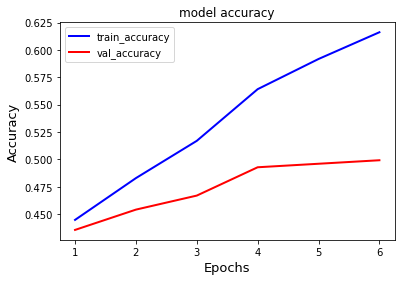

In [27]:
from matplotlib import pyplot as plt
plt.plot(history.epoch, history.train_accuracy, color='blue', linewidth="2", label= 'train_accuracy')
plt.plot(history.epoch, history.val_accuracy, color='red', linewidth="2", label= 'val_accuracy')
plt.xlabel('Epochs', fontsize = "13")
plt.ylabel('Accuracy', fontsize = "13")
plt.title('model accuracy')
plt.legend()
plt.show()

## Model Prediction

In [28]:
model.eval()

from sklearn.metrics import confusion_matrix


SAMPLE_FRAC = 0.1

df_train = train_df.sample(frac=SAMPLE_FRAC, random_state=1)
max(df_train.text.apply(lambda x : len(x)))
trainset = Emotion_Train_Dataset(df_train, tokenizer=tokenizer, mode = "train")
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, 
                          collate_fn=create_mini_batch)
_, acc = get_predictions(model, trainloader, compute_acc=True)
print("classification acc:", acc)

classification acc: 0.6298076923076923


In [29]:
predictions = get_predictions(model, trainloader)
index_map = {v: k for k, v in trainset.label_map.items()}
df = pd.DataFrame({"emotion": predictions.tolist()})
df['emotion'] = df.emotion.apply(lambda x: index_map[x])
#print(df_train.emotion)
cm = confusion_matrix(y_true = df_train.emotion, y_pred = df.emotion)
print(cm)
print("classification acc:", acc)

[[ 11   4   8   4  10   8   2   1]
 [  1 163   6   6  37   7   0  14]
 [ 11   5  69   2  11  38   1   1]
 [  1  10   0  27  14   3   0   5]
 [  1  43   5   6 428   6   1  39]
 [  3  14  20   7  29 113   2   4]
 [  2   3   5  14  15   9   1   1]
 [  0  22   3   0  71   4   0 105]]
classification acc: 0.6298076923076923


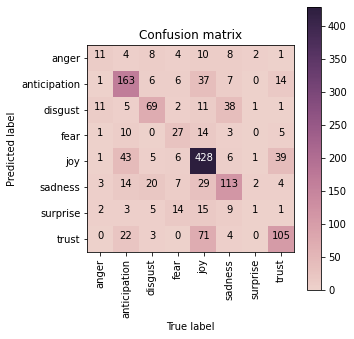

In [30]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')
    ax.set_xticklabels(classes, rotation=90)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()
    
# plot your confusion matrix
my_tags = ['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

## Testset

In [31]:
df_whole = pd.merge(tweet_df, identification_df)

In [32]:
df_test = df_whole[(df_whole['identification'] == 'test')]
dftest_id = df_test.tweet_id
dftest_id = dftest_id.reset_index()
df_test = df_test.reset_index()
dftest_id.drop('index', inplace=True, axis=1)
df_test.drop('index', inplace=True, axis=1)
df_test.text = df_test.text.apply(lambda x: re.sub('|<|>|@|#|0|1|2|3|4|5|6|7|8|9', '', x))
df_test.text = df_test.text.apply(lambda x: re.sub('|:|pm|am|AM|PM', '', x))
df_test

,tweet_id,text,hashtag,identification
0,0x28b412,"Confident of your obedience, I write to you, k...",bibleverse,test
1,0x2de201,"""Trust is not the se as faith. A friend is som...",,test
2,0x218443,When do you have enough ? When are you satisfi...,materialism money possessions,test
3,0x2939d5,"God woke you up, now chase the day GodsPlan Go...",GodsPlan GodsWork,test
4,0x26289a,"In these tough times, who do YOU turn to as yo...",,test
...,...,...,...,...
411967,0x2913b4,"""For this is the message that ye heard from th...",,test
411968,0x2a980e,"""There is a lad here, which hath five barley l...",,test
411969,0x316b80,When you buy the last tickets remaining for a...,mixedfeeling butimTHATperson,test
411970,0x29d0cb,I swear all this hard work gone pay off one da...,,test


In [33]:
df_test.drop('tweet_id', inplace=True, axis=1)
df_test.drop('identification', inplace=True, axis=1)

In [34]:
df_test.text.apply(lambda x: re.sub('|<|>|@|#|', '', x))
max(df_test.text.apply(lambda x : len(x)))

246

In [35]:
testset = Emotion_Train_Dataset(df_test, tokenizer=tokenizer, mode = "test")

In [36]:
testloader = DataLoader(testset, batch_size=16, 
                        collate_fn=create_mini_batch)

In [37]:
data = next(iter(testloader))

tokens_tensors,  masks_tensors, la = data

print(f"""
tokens_tensors.shape   = {tokens_tensors.shape} 
{tokens_tensors}
------------------------
masks_tensors.shape    = {masks_tensors.shape}
{masks_tensors}
------------------------

""")


tokens_tensors.shape   = torch.Size([16, 53]) 
tensor([[  101,  9657,  1997,  2115, 22645,  1010,  1045,  4339,  2000,  2017,
          1010,  4209,  2008,  2017,  2097,  2079,  2130,  2062,  2084,  1045,
          3198,  1012,  1006,  6316, 26941,  1007,  1013,  6331, 16070,   102,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0],
        [  101,  1000,  3404,  2003,  2025,  1996,  7367,  2004,  4752,  1012,
          1037,  2767,  2003,  2619,  2017,  3404,  1012,  5128,  4752,  1999,
          3087,  2003,  1037,  6707,  1012,  1000,  1066,  5696, 27738,  6132,
           102,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0],
        [  101,  2043,  2079,  2017,  2031,  2438,  1029,  2043,  2024,  2017,
          8510,  1029

In [38]:
%%time
# 用分類模型預測測試集
predictions = get_predictions(model, testloader)

# 用來將預測的 label id 轉回 label 文字
index_map = {v: k for k, v in testset.label_map.items()}

# 生成 Kaggle 繳交檔案
df = pd.DataFrame({"emotion": predictions.tolist()})
df['emotion'] = df.emotion.apply(lambda x: index_map[x])
submission = pd.concat([dftest_id, 
                          df.loc[:, 'emotion']], axis=1)
submission.columns = ['id', 'emotion']
submission.to_csv('submission.csv', index=False)
#df_pred.head()
submission

CPU times: user 22min 3s, sys: 1.49 s, total: 22min 5s
Wall time: 22min 10s


,id,emotion
0,0x28b412,anticipation
1,0x2de201,anticipation
2,0x218443,anticipation
3,0x2939d5,joy
4,0x26289a,trust
...,...,...
411967,0x2913b4,anticipation
411968,0x2a980e,anticipation
411969,0x316b80,sadness
411970,0x29d0cb,joy


In [39]:
submission

,id,emotion
0,0x28b412,anticipation
1,0x2de201,anticipation
2,0x218443,anticipation
3,0x2939d5,joy
4,0x26289a,trust
...,...,...
411967,0x2913b4,anticipation
411968,0x2a980e,anticipation
411969,0x316b80,sadness
411970,0x29d0cb,joy
